In [1]:
import numpy as np
import sys
sys.path.append('/eagle/fthmc/run')
from Scaling_FT_HMC.utils.func import auto_from_chi
from lametlat.utils.plot_settings import *

### L32 b3

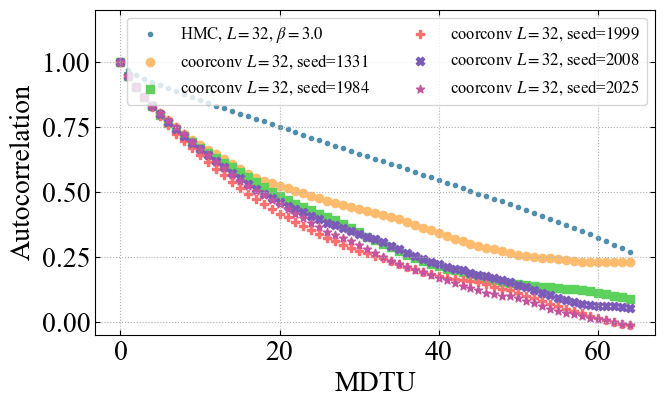

In [10]:
hmc_L32_b3_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta3.0.csv')

fthmc_coorconv_L32_b3_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/coorconv_evaluation/dumps/topo_fthmc_L32_beta3.0_coorconv_train_b3.0_L32_1331.csv')
fthmc_coorconv_L32_b3_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/coorconv_evaluation/dumps/topo_fthmc_L32_beta3.0_coorconv_train_b3.0_L32_1984.csv')
fthmc_coorconv_L32_b3_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/coorconv_evaluation/dumps/topo_fthmc_L32_beta3.0_coorconv_train_b3.0_L32_1999.csv')
fthmc_coorconv_L32_b3_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/coorconv_evaluation/dumps/topo_fthmc_L32_beta3.0_coorconv_train_b3.0_L32_2008.csv')
fthmc_coorconv_L32_b3_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/coorconv_evaluation/dumps/topo_fthmc_L32_beta3.0_coorconv_train_b3.0_L32_2025.csv')

beta = 3.0
max_lag = 64
volume = 32**2

hmc_L32_b3_auto = auto_from_chi(hmc_L32_b3_topo, max_lag=max_lag, beta=beta, volume=volume)

fthmc_coorconv_L32_b3_auto_1331 = auto_from_chi(fthmc_coorconv_L32_b3_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_coorconv_L32_b3_auto_1984 = auto_from_chi(fthmc_coorconv_L32_b3_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_coorconv_L32_b3_auto_1999 = auto_from_chi(fthmc_coorconv_L32_b3_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_coorconv_L32_b3_auto_2008 = auto_from_chi(fthmc_coorconv_L32_b3_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_coorconv_L32_b3_auto_2025 = auto_from_chi(fthmc_coorconv_L32_b3_topo_2025, max_lag=max_lag, beta=beta, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b3_auto)), hmc_L32_b3_auto, label='HMC, $L=32$, $\\beta=3.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_coorconv_L32_b3_auto_1331)), fthmc_coorconv_L32_b3_auto_1331, label='coorconv $L=32$, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_coorconv_L32_b3_auto_1984)), fthmc_coorconv_L32_b3_auto_1984, label='coorconv $L=32$, seed=$1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_coorconv_L32_b3_auto_1999)), fthmc_coorconv_L32_b3_auto_1999, label='coorconv $L=32$, seed=$1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_coorconv_L32_b3_auto_2008)), fthmc_coorconv_L32_b3_auto_2008, label='coorconv $L=32$, seed=$2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_coorconv_L32_b3_auto_2025)), fthmc_coorconv_L32_b3_auto_2025, label='coorconv $L=32$, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(-0.05, 1.2)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/coorconv_train_b3_L32_autocorrelation_L32_b3.pdf', transparent=True)
plt.show()


In [3]:

gamma_hmc = 1 / (1 - hmc_L32_b3_auto[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_coorconv_L32_b3_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_coorconv_L32_b3_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_coorconv_L32_b3_auto_1999[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_coorconv_L32_b3_auto_2008[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_coorconv_L32_b3_auto_2025[16])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b3_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])
gamma_ratio_L32_b3_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L32 b3: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2025}")
print(f"mean(16) for L32 b3: {gamma_ratio_L32_b3_mean}")
print(f"std(16) for L32 b3: {gamma_ratio_L32_b3_std}")

deltaQ_hmc = [ abs(hmc_L32_b3_topo[i] - hmc_L32_b3_topo[i-1]) for i in range(1, len(hmc_L32_b3_topo))]
deltaQ_fthmc_1331 = [ abs(fthmc_coorconv_L32_b3_topo_1331[i] - fthmc_coorconv_L32_b3_topo_1331[i-1]) for i in range(1, len(fthmc_coorconv_L32_b3_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_coorconv_L32_b3_topo_1984[i] - fthmc_coorconv_L32_b3_topo_1984[i-1]) for i in range(1, len(fthmc_coorconv_L32_b3_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_coorconv_L32_b3_topo_1999[i] - fthmc_coorconv_L32_b3_topo_1999[i-1]) for i in range(1, len(fthmc_coorconv_L32_b3_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_coorconv_L32_b3_topo_2008[i] - fthmc_coorconv_L32_b3_topo_2008[i-1]) for i in range(1, len(fthmc_coorconv_L32_b3_topo_2008))]
deltaQ_fthmc_2025 = [ abs(fthmc_coorconv_L32_b3_topo_2025[i] - fthmc_coorconv_L32_b3_topo_2025[i-1]) for i in range(1, len(fthmc_coorconv_L32_b3_topo_2025))]

deltaQ_hmc_L32_b3_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b3_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b3_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])


print("\n>>> deltaQ")
print(f"deltaQ for HMC L32 b3: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b3: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L32 b3: {deltaQ_fthmc_L32_b3_mean / deltaQ_hmc_L32_b3_mean}")
print(f"std(deltaQ) ratio for FTHMC L32 b3: {deltaQ_fthmc_L32_b3_std / deltaQ_hmc_L32_b3_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b3: 2.0568181818181825, 2.1205578512396697, 2.4221074380165293, 2.2401342975206617, 2.280268595041323
mean(16) for L32 b3: 2.2239772727272733
std(16) for L32 b3: 0.12753279047364294

>>> deltaQ
deltaQ for HMC L32 b3: 0.49474969474969477
deltaQ for FTHMC L32 b3: 0.6095238095238096, 0.6002442002442002, 0.600976800976801, 0.6105006105006106, 0.6046398046398046
mean(deltaQ) ratio for FTHMC L32 b3: 1.2231984205330704
std(deltaQ) ratio for FTHMC L32 b3: 0.008551394996133424


### L32 b6

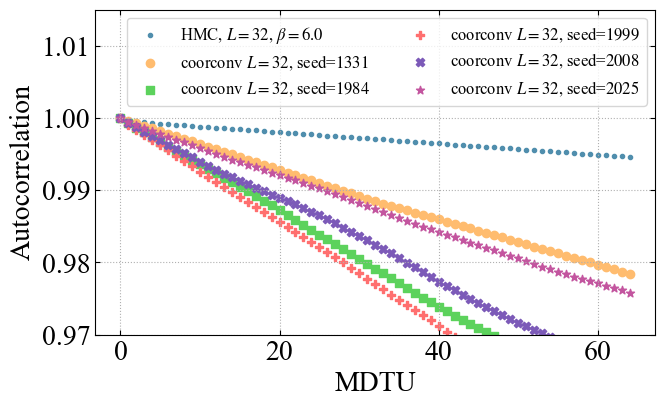

In [11]:
hmc_L32_b6_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L32_beta6.0.csv')

fthmc_coorconv_L32_b6_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/coorconv_evaluation/dumps/topo_fthmc_L32_beta6.0_coorconv_train_b3.0_L32_1331.csv')
fthmc_coorconv_L32_b6_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/coorconv_evaluation/dumps/topo_fthmc_L32_beta6.0_coorconv_train_b3.0_L32_1984.csv')
fthmc_coorconv_L32_b6_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/coorconv_evaluation/dumps/topo_fthmc_L32_beta6.0_coorconv_train_b3.0_L32_1999.csv')
fthmc_coorconv_L32_b6_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/coorconv_evaluation/dumps/topo_fthmc_L32_beta6.0_coorconv_train_b3.0_L32_2008.csv')
fthmc_coorconv_L32_b6_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/coorconv_evaluation/dumps/topo_fthmc_L32_beta6.0_coorconv_train_b3.0_L32_2025.csv')

beta = 6.0
max_lag = 64
volume = 32**2

hmc_L32_b6_auto = auto_from_chi(hmc_L32_b6_topo, max_lag=max_lag, beta=beta, volume=volume)

fthmc_coorconv_L32_b6_auto_1331 = auto_from_chi(fthmc_coorconv_L32_b6_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_coorconv_L32_b6_auto_1984 = auto_from_chi(fthmc_coorconv_L32_b6_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_coorconv_L32_b6_auto_1999 = auto_from_chi(fthmc_coorconv_L32_b6_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_coorconv_L32_b6_auto_2008 = auto_from_chi(fthmc_coorconv_L32_b6_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_coorconv_L32_b6_auto_2025 = auto_from_chi(fthmc_coorconv_L32_b6_topo_2025, max_lag=max_lag, beta=beta, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L32_b6_auto)), hmc_L32_b6_auto, label='HMC, $L=32$, $\\beta=6.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_coorconv_L32_b6_auto_1331)), fthmc_coorconv_L32_b6_auto_1331, label='coorconv $L=32$, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_coorconv_L32_b6_auto_1984)), fthmc_coorconv_L32_b6_auto_1984, label='coorconv $L=32$, seed=$1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_coorconv_L32_b6_auto_1999)), fthmc_coorconv_L32_b6_auto_1999, label='coorconv $L=32$, seed=$1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_coorconv_L32_b6_auto_2008)), fthmc_coorconv_L32_b6_auto_2008, label='coorconv $L=32$, seed=$2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_coorconv_L32_b6_auto_2025)), fthmc_coorconv_L32_b6_auto_2025, label='coorconv $L=32$, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(0.97, 1.015)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/coorconv_train_b3_L32_autocorrelation_L32_b6.pdf', transparent=True)
plt.show()


In [5]:

gamma_hmc = 1 / (1 - hmc_L32_b6_auto[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_coorconv_L32_b6_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_coorconv_L32_b6_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_coorconv_L32_b6_auto_1999[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_coorconv_L32_b6_auto_2008[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_coorconv_L32_b6_auto_2025[16])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L32_b6_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])
gamma_ratio_L32_b6_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L32 b6: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2025}")
print(f"mean(16) for L32 b6: {gamma_ratio_L32_b6_mean}")
print(f"std(16) for L32 b6: {gamma_ratio_L32_b6_std}")

deltaQ_hmc = [ abs(hmc_L32_b6_topo[i] - hmc_L32_b6_topo[i-1]) for i in range(1, len(hmc_L32_b6_topo))]
deltaQ_fthmc_1331 = [ abs(fthmc_coorconv_L32_b6_topo_1331[i] - fthmc_coorconv_L32_b6_topo_1331[i-1]) for i in range(1, len(fthmc_coorconv_L32_b6_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_coorconv_L32_b6_topo_1984[i] - fthmc_coorconv_L32_b6_topo_1984[i-1]) for i in range(1, len(fthmc_coorconv_L32_b6_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_coorconv_L32_b6_topo_1999[i] - fthmc_coorconv_L32_b6_topo_1999[i-1]) for i in range(1, len(fthmc_coorconv_L32_b6_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_coorconv_L32_b6_topo_2008[i] - fthmc_coorconv_L32_b6_topo_2008[i-1]) for i in range(1, len(fthmc_coorconv_L32_b6_topo_2008))]
deltaQ_fthmc_2025 = [ abs(fthmc_coorconv_L32_b6_topo_2025[i] - fthmc_coorconv_L32_b6_topo_2025[i-1]) for i in range(1, len(fthmc_coorconv_L32_b6_topo_2025))]

deltaQ_hmc_L32_b6_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L32_b6_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L32_b6_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])


print("\n>>> deltaQ")
print(f"deltaQ for HMC L32 b6: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L32 b6: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L32 b6: {deltaQ_fthmc_L32_b6_mean / deltaQ_hmc_L32_b6_mean}")
print(f"std(deltaQ) ratio for FTHMC L32 b6: {deltaQ_fthmc_L32_b6_std / deltaQ_hmc_L32_b6_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L32 b6: 3.5, 6.156250000000038, 7.062500000000043, 5.593749999999996, 3.937500000000025
mean(16) for L32 b6: 5.25000000000002
std(16) for L32 b6: 1.3423684758664558

>>> deltaQ
deltaQ for HMC L32 b6: 0.002686202686202686
deltaQ for FTHMC L32 b6: 0.003418803418803419, 0.006349206349206349, 0.00805860805860806, 0.006105006105006105, 0.004884004884004884
mean(deltaQ) ratio for FTHMC L32 b6: 2.1454545454545455
std(deltaQ) ratio for FTHMC L32 b6: 0.5766818737146803


### L64 b6

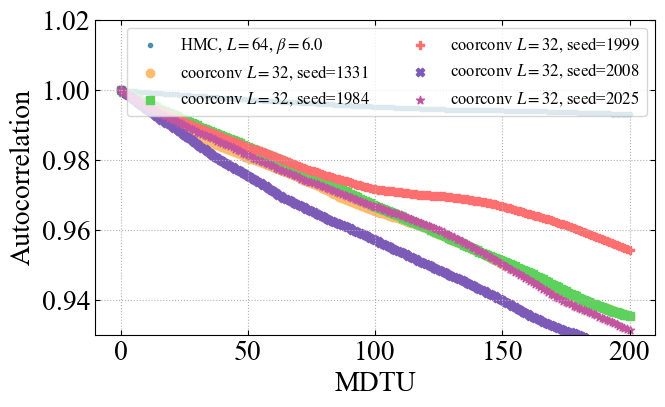

In [12]:
hmc_L64_b6_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L64_beta6.0.csv')

fthmc_coorconv_L64_b6_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/coorconv_evaluation/dumps/topo_fthmc_L64_beta6.0_coorconv_train_b3.0_L32_1331.csv')
fthmc_coorconv_L64_b6_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/coorconv_evaluation/dumps/topo_fthmc_L64_beta6.0_coorconv_train_b3.0_L32_1984.csv')
fthmc_coorconv_L64_b6_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/coorconv_evaluation/dumps/topo_fthmc_L64_beta6.0_coorconv_train_b3.0_L32_1999.csv')
fthmc_coorconv_L64_b6_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/coorconv_evaluation/dumps/topo_fthmc_L64_beta6.0_coorconv_train_b3.0_L32_2008.csv')
fthmc_coorconv_L64_b6_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/coorconv_evaluation/dumps/topo_fthmc_L64_beta6.0_coorconv_train_b3.0_L32_2025.csv')

max_lag = 200
beta = 6.0
volume = 64**2

hmc_L64_b6_auto = auto_from_chi(hmc_L64_b6_topo, max_lag=max_lag, beta=beta, volume=volume)

fthmc_coorconv_L64_b6_auto_1331 = auto_from_chi(fthmc_coorconv_L64_b6_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_coorconv_L64_b6_auto_1984 = auto_from_chi(fthmc_coorconv_L64_b6_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_coorconv_L64_b6_auto_1999 = auto_from_chi(fthmc_coorconv_L64_b6_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_coorconv_L64_b6_auto_2008 = auto_from_chi(fthmc_coorconv_L64_b6_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_coorconv_L64_b6_auto_2025 = auto_from_chi(fthmc_coorconv_L64_b6_topo_2025, max_lag=max_lag, beta=beta, volume=volume)

fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L64_b6_auto)), hmc_L64_b6_auto, label='HMC, $L=64$, $\\beta=6.0$', marker=marker_ls[0], color=color_ls[0])

ax.scatter(np.arange(len(fthmc_coorconv_L64_b6_auto_1331)), fthmc_coorconv_L64_b6_auto_1331, label='coorconv $L=32$, seed=$1331$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_coorconv_L64_b6_auto_1984)), fthmc_coorconv_L64_b6_auto_1984, label='coorconv $L=32$, seed=$1984$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_coorconv_L64_b6_auto_1999)), fthmc_coorconv_L64_b6_auto_1999, label='coorconv $L=32$, seed=$1999$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_coorconv_L64_b6_auto_2008)), fthmc_coorconv_L64_b6_auto_2008, label='coorconv $L=32$, seed=$2008$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_coorconv_L64_b6_auto_2025)), fthmc_coorconv_L64_b6_auto_2025, label='coorconv $L=32$, seed=$2025$', marker=marker_ls[5], color=color_ls[5])

ax.set_ylim(0.93, 1.02)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/coorconv_train_b3_L32_autocorrelation_L64_b6.pdf', transparent=True)
plt.show()


In [7]:
gamma_hmc = 1 / (1 - hmc_L64_b6_auto[16])

gamma_fthmc_1331 = 1 / (1 - fthmc_coorconv_L64_b6_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_coorconv_L64_b6_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_coorconv_L64_b6_auto_1999[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_coorconv_L64_b6_auto_2008[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_coorconv_L64_b6_auto_2025[16])

gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L64_b6_mean = np.mean([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])
gamma_ratio_L64_b6_std = np.std([gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2008, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L64 b6: {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2008}, {gamma_ratio_2025}")
print(f"mean(16) for L64 b6: {gamma_ratio_L64_b6_mean}")
print(f"std(16) for L64 b6: {gamma_ratio_L64_b6_std}")

deltaQ_hmc = [ abs(hmc_L64_b6_topo[i] - hmc_L64_b6_topo[i-1]) for i in range(1, len(hmc_L64_b6_topo))]
deltaQ_fthmc_1331 = [ abs(fthmc_coorconv_L64_b6_topo_1331[i] - fthmc_coorconv_L64_b6_topo_1331[i-1]) for i in range(1, len(fthmc_coorconv_L64_b6_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_coorconv_L64_b6_topo_1984[i] - fthmc_coorconv_L64_b6_topo_1984[i-1]) for i in range(1, len(fthmc_coorconv_L64_b6_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_coorconv_L64_b6_topo_1999[i] - fthmc_coorconv_L64_b6_topo_1999[i-1]) for i in range(1, len(fthmc_coorconv_L64_b6_topo_1999))]
deltaQ_fthmc_2008 = [ abs(fthmc_coorconv_L64_b6_topo_2008[i] - fthmc_coorconv_L64_b6_topo_2008[i-1]) for i in range(1, len(fthmc_coorconv_L64_b6_topo_2008))]
deltaQ_fthmc_2025 = [ abs(fthmc_coorconv_L64_b6_topo_2025[i] - fthmc_coorconv_L64_b6_topo_2025[i-1]) for i in range(1, len(fthmc_coorconv_L64_b6_topo_2025))]

deltaQ_hmc_L64_b6_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L64_b6_mean = np.mean([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L64_b6_std = np.std([np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_2025)])

print("\n>>> deltaQ")
print(f"deltaQ for HMC L64 b6: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L64 b6: {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) ratio for FTHMC L64 b6: {deltaQ_fthmc_L64_b6_mean / deltaQ_hmc_L64_b6_mean}")
print(f"std(deltaQ) ratio for FTHMC L64 b6: {deltaQ_fthmc_L64_b6_std / deltaQ_hmc_L64_b6_mean}")

>>> gamma ratio (16)
gamma ratio (16) for L64 b6: 6.831249999999782, 5.568749999999828, 6.237499999999829, 8.306249999999766, 6.712499999999813
mean(16) for L64 b6: 6.731249999999804
std(16) for L64 b6: 0.9040101631065653

>>> deltaQ
deltaQ for HMC L64 b6: 0.005860805860805861
deltaQ for FTHMC L64 b6: 0.021733821733821733, 0.021001221001221003, 0.022222222222222223, 0.019536019536019536, 0.021001221001221003
mean(deltaQ) ratio for FTHMC L64 b6: 3.6000000000000005
std(deltaQ) ratio for FTHMC L64 b6: 0.15500896031448563


In [8]:

# fig, (ax1, ax2) = default_sub_plot()
# # Adjust subplot spacing
# plt.subplots_adjust(left=0.1,    # Increase left margin
#                     right=0.95,    # Decrease right margin
#                     bottom=0.15,   # Increase bottom margin 
#                     top=0.95)      # Decrease top margin

# ax1.errorbar(np.arange(3, 7), [gamma_ratio_L32_b3_mean, gamma_ratio_L32_b4_mean, gamma_ratio_L32_b5_mean, gamma_ratio_L32_b6_mean], yerr=[gamma_ratio_L32_b3_std, gamma_ratio_L32_b4_std, gamma_ratio_L32_b5_std, gamma_ratio_L32_b6_std], label='Base model trained on $\\beta=3.0$, $L=32$', **errorb_circle)
# ax2.errorbar(np.arange(3, 7), [deltaQ_fthmc_L32_b3_mean / deltaQ_hmc_L32_b3_mean, deltaQ_fthmc_L32_b4_mean / deltaQ_hmc_L32_b4_mean, deltaQ_fthmc_L32_b5_mean / deltaQ_hmc_L32_b5_mean, deltaQ_fthmc_L32_b6_mean / deltaQ_hmc_L32_b6_mean], yerr=[deltaQ_fthmc_L32_b3_std / deltaQ_hmc_L32_b3_mean, deltaQ_fthmc_L32_b4_std / deltaQ_hmc_L32_b4_mean, deltaQ_fthmc_L32_b5_std / deltaQ_hmc_L32_b5_mean, deltaQ_fthmc_L32_b6_std / deltaQ_hmc_L32_b6_mean], **errorb_circle)
# ax1.set_ylabel('$R_{\\gamma (\\delta =16)}$', **fs_p)
# ax1.set_ylim(0.8, 7.5)
# ax2.set_xlabel('$\\beta$ with $L=32$', **fs_p)
# ax2.set_ylabel('$R_{\\Delta Q}$', **fs_p)
# ax2.set_ylim(0.8, 4.2)
# ax1.legend(ncol=2, loc='upper right', **fs_small_p)
# # plt.tight_layout()
# # plt.savefig('plots/performance_L32.pdf', transparent=True)
# plt.show()